In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insurance.csv')

In [5]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [11]:
# Check Null values

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
# Check Duplicate records 

print(df.duplicated().sum())

1


In [15]:
df.drop_duplicates(inplace= True)

In [17]:
df.duplicated().sum()

0

In [21]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [23]:
df['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [25]:
df['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [27]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [43]:
df['children'].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

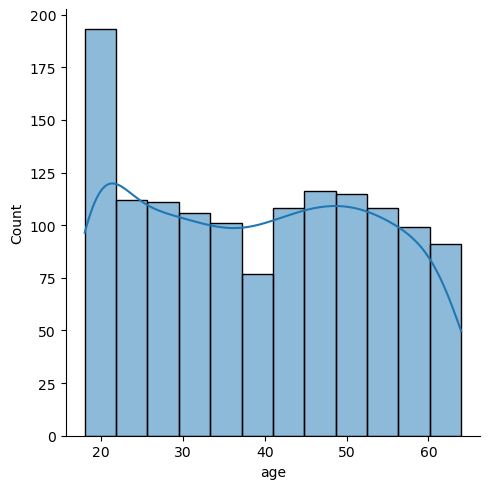

In [33]:
sns.displot(df['age'] , kde=True)

Text(0.5, 1.0, 'Sex Distribution')

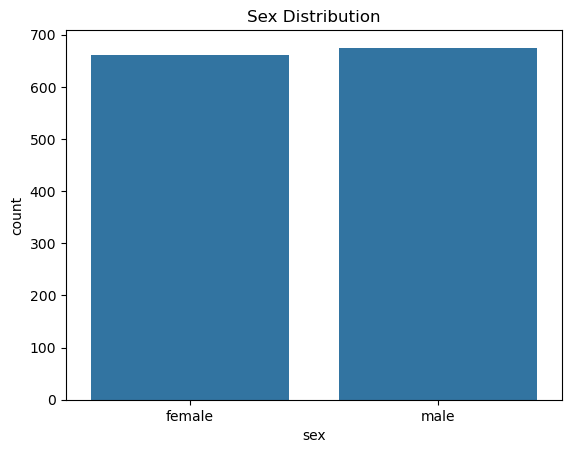

In [35]:
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')

Text(0.5, 1.0, 'BMI Distribution')

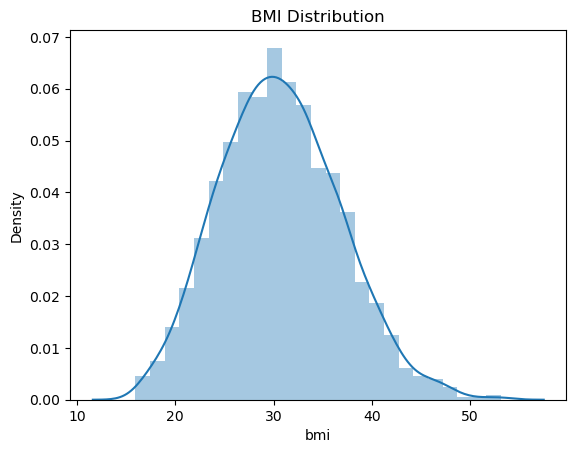

In [39]:
sns.distplot(df['bmi'])
plt.title('BMI Distribution')

Text(0.5, 1.0, 'Children')

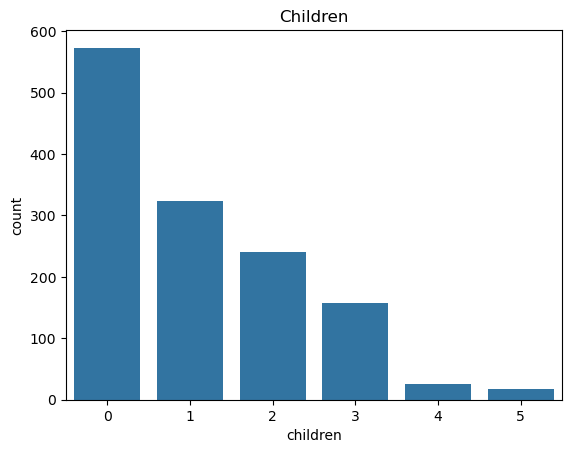

In [41]:
sns.countplot(x='children', data=df)
plt.title('Children')

Text(0.5, 1.0, 'Smoker Distribution')

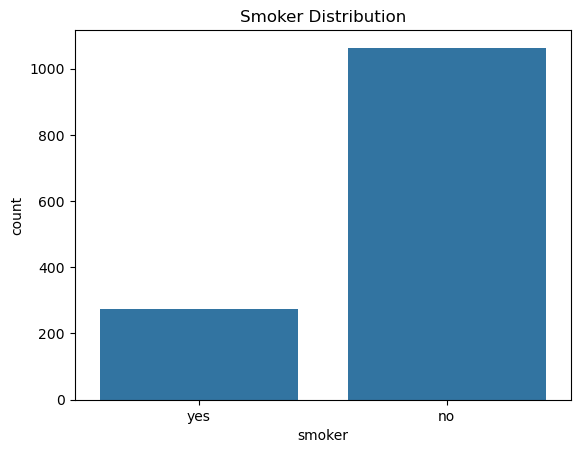

In [45]:
sns.countplot(x='smoker' , data=df)
plt.title("Smoker Distribution")

Text(0.5, 1.0, 'region')

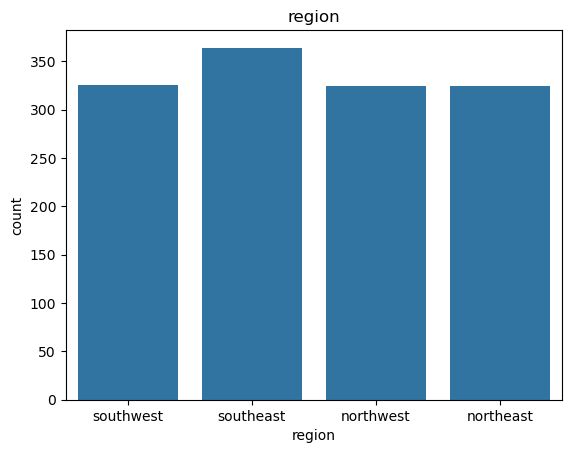

In [49]:
sns.countplot(x='region', data=df)
plt.title('region')

# Data Preprocessing

In [52]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [54]:
# Encode sex column

df.replace({'sex' : {'male' : 0 , 'female' : 1}} , inplace= True)

# Encode smoker column

df.replace({'smoker' : {'no' : 0 , 'yes' : 1}} , inplace= True)

# Encode region
df.replace({'region' : {'southwest' : 0 , 'southeast' : 1 ,'northwest' : 2 , 'northeast' : 3}} , inplace= True) 

In [56]:
df.head()

age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       1       0  16884.92400
1   18    0  33.770         1       0       1   1725.55230
2   28    0  33.000         3       0       1   4449.46200
3   33    0  22.705         0       0       2  21984.47061
4   32    0  28.880         0       0       2   3866.85520

In [60]:
# Cinvert into dependent and independent feature 
X = df.drop('charges' , axis =1 )
y = df['charges']

In [62]:
X

age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       0
1      18    0  33.770         1       0       1
2      28    0  33.000         3       0       1
3      33    0  22.705         0       0       2
4      32    0  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       2
1334   18    1  31.920         0       0       3
1335   18    1  36.850         0       0       1
1336   21    1  25.800         0       0       0
1337   61    1  29.070         0       1       2

[1337 rows x 6 columns]

In [64]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [66]:
# Split data into train and test part 

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.25 , random_state= 42) 

In [68]:
X_train.shape , X_test.shape

((1002, 6), (335, 6))

# Model Training 

In [71]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train , y_train)

LinearRegression()

In [73]:
y_pred = lr.predict(X_test)

In [75]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

print("MSE:- " , mean_squared_error(y_pred , y_test))
print("MAE:- " , mean_absolute_error(y_pred , y_test))
print("R2_Score:- " , r2_score(y_pred , y_test))


MSE:-  35229015.32733745
MAE:-  4063.0773793105795
R2_Score:-  0.6805681391208531


In [85]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(X_train , y_train)

SVR(kernel='linear')

In [87]:
y_pred_svr = svr.predict(X_test)

In [89]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

print("MSE:- " , mean_squared_error(y_pred_svr , y_test))
print("MAE:- " , mean_absolute_error(y_pred_svr , y_test))
print("R2_Score:- " , r2_score(y_pred_svr , y_test))


MSE:-  191975722.44644278
MAE:-  6930.45933254478
R2_Score:-  -12.404122230997583


In [91]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train , y_train)

RandomForestRegressor()

In [93]:
y_pred_rfr = rfr.predict(X_test)

In [95]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

print("MSE:- " , mean_squared_error(y_pred_rfr , y_test))
print("MAE:- " , mean_absolute_error(y_pred_rfr , y_test))
print("R2_Score:- " , r2_score(y_pred_rfr , y_test))


MSE:-  22806341.027211078
MAE:-  2637.4266453298505
R2_Score:-  0.8475823879647368
